<a href="https://colab.research.google.com/github/EkaterinaArslanbaeva/Assigment3/blob/main/Arslanbaeva_Assigment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# Ekaterina Arslanbaeva Assigment 3

## Abstract

In my 30's I am worried about my health the most, so human health is the topic I am interested in. For this assignment, I selected datasets related to human health.

### Linear Regression
For the first half of the assignment, which is performing a linear regression algorithm, I selected the dataset "World Bank WDI  2.12 - Health Systems" from kaggle.com. This dataset has a usability score of 10.0 and 14 columns. Most of them quantitative columns, which makes it the perfect selection for this assignment's first half. The dataset describes spending for the citizen's health per capita by Country, as well as the number of doctors, nurses, and surgeon staff per capita.

I assume a strict correlation between the amount of money spent on the health system in the city and the number of professional health staff the city has. In this assignment, I will predict the number of doctors in the city per 1000 people by provided spendings for the health system in the United States dollar currency. I hope to find proof of this assumption by using a linear regression model.

### Binary Classifier: Decision Tree
For the second half of the assignment, I decided to to the decision tree algorithm. For this task, I selected "US Health Insurance Dataset" from kaggle.com. This dataset has usability 9.4 and 7 columns, half of the columns are quantitative, and the other half qualitative features that can be mapped, which makes it good for the second half of the assignment. This dataset describes insurance charges in the united states with information about insured people. The information includes age, sex, BMI, number of children, if insured person smoker or not, and region of living.

It is hard for me to make assumptions before starting to analyze this dataset, but I suggest that I will be able to predict if a person is a smoker or not by providing all other features in model prediction. I hope to find that prediction is accurate by providing information about people I know, including myself.


## Section 1: Prepping the Regression datasets

The columns of the dataset are different types of expenses for human health in cities all around the world and the number of medical staff in this city for every thousand citizens of that city. You can see the columns in the first fifteen rows, which printed below. The major libraries I will use to perform all needed steps are pandas, NumPy, and sklearn.

In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
sns.set()
import warnings # turn off warnings for final notebook
warnings.filterwarnings("ignore")
import os # accessing directory structure

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [166]:
health = pd.read_csv('Health_systems.csv') #import dtaset using pandas

In [167]:
health.head(15) #first 15 rows of data

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
5,Antigua and Barbuda,NaN,Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0.0,2.8,3.1,14.0,NaN,79.0
6,Argentina,NaN,Argentina,7.5,74.4,15.8,955.2,1531.0,0.6,4.0,2.6,50.1,100.0,100.0
7,Armenia,NaN,Armenia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,76.0
8,Australia,NaN,Australia,9.3,68.3,18.9,5002.4,4529.9,0.0,3.6,12.7,45.1,100.0,100.0
9,Austria,NaN,Austria,10.4,72.5,18.9,4688.3,5295.2,NaN,5.1,8.2,109.9,100.0,100.0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Health_exp_pct_GDP_2016'),
  Text(1.5, 0, 'Health_exp_public_pct_2016'),
  Text(2.5, 0, 'Health_exp_out_of_pocket_pct_2016'),
  Text(3.5, 0, 'Health_exp_per_capita_USD_2016'),
  Text(4.5, 0, 'per_capita_exp_PPP_2016'),
  Text(5.5, 0, 'External_health_exp_pct_2016'),
  Text(6.5, 0, 'Physicians_per_1000_2009-18'),
  Text(7.5, 0, 'Nurse_midwife_per_1000_2009-18'),
  Text(8.5, 0, 'Specialist_surgical_per_1000_2008-18'),
  Text(9.5, 0, 'Completeness_of_birth_reg_2009-18'),
  Text(10.5, 0, 'Completeness_of_death_reg_2008-16')])

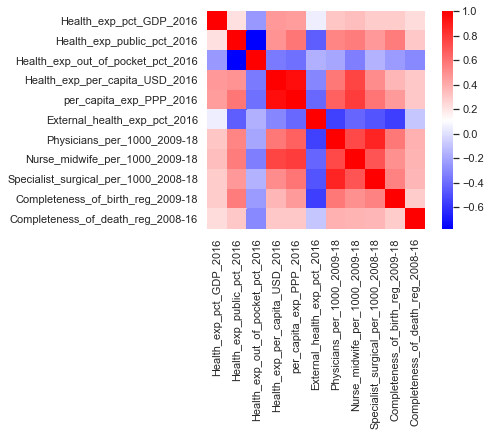

In [168]:
#heatmap to undentify possible high correlation values between the features
import seaborn as sns 
correlations = health.corr()
sns.heatmap(data=correlations, square=True, cmap="bwr")

plt.yticks(rotation=0)
plt.xticks(rotation =90)

On the heatmap above, I can see a pretty high, about 0.7, the correlation value between the number of physicians and spendings in USD per capita. That means I can use these values to perform simple linear regression. The number of physicians will be my target value in this case. I will create a new dataset with just these two columns since I am no longer interested in other data from this dataset.

In [169]:
#Columns used for simple linear regression: Health_exp_per_capita_USD_2016, Physicians_per_1000_2009-18

In [170]:
dataset1 = health[["Health_exp_per_capita_USD_2016", "Physicians_per_1000_2009-18"]]
dataset1.head(15)

,Health_exp_per_capita_USD_2016,Physicians_per_1000_2009-18
0,57.2,0.3
1,271.5,1.2
2,260.4,1.8
3,3834.7,3.3
4,95.2,0.2
5,623.1,2.8
6,955.2,4.0
7,358.8,2.9
8,5002.4,3.6
9,4688.3,5.1


In [171]:
dataset1.shape

(210, 2)

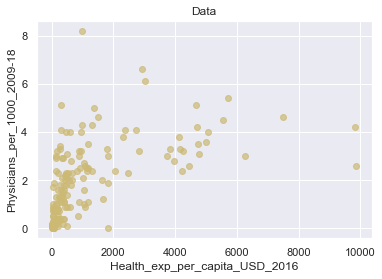

In [172]:
plt.scatter(health["Health_exp_per_capita_USD_2016"], health["Physicians_per_1000_2009-18"], color='y', alpha=.7)
plt.title("Data")
plt.xlabel("Health_exp_per_capita_USD_2016")
plt.ylabel("Physicians_per_1000_2009-18")
plt.show()

The dataset has 210 rows before it is clean up. in the next step, I will get rid of outliers in the data and rows which consist not valid data. I can see possible outliers in the data.

In [173]:
dataset2 = dataset1[(dataset1["Health_exp_per_capita_USD_2016"] < 6000)]
dataset = dataset2 [(dataset2["Physicians_per_1000_2009-18"] < 6)]

In [174]:
dataset["Health_exp_per_capita_USD_2016"].replace('', np.nan, inplace=True)

In [175]:
dataset.dropna(subset=["Health_exp_per_capita_USD_2016"], inplace=True)

In [176]:
dataset.shape

(177, 2)

In [177]:
dataset["Physicians_per_1000_2009-18"].replace('', np.nan, inplace=True)

In [178]:
dataset.dropna(subset=["Physicians_per_1000_2009-18"], inplace=True)

In [179]:
dataset.shape

(177, 2)

After finished the dataset clean-up, I have 177 data rows to work with.

In [180]:
dataset.head(15)

,Health_exp_per_capita_USD_2016,Physicians_per_1000_2009-18
0,57.2,0.3
1,271.5,1.2
2,260.4,1.8
3,3834.7,3.3
4,95.2,0.2
5,623.1,2.8
6,955.2,4.0
7,358.8,2.9
8,5002.4,3.6
9,4688.3,5.1


In [181]:
dataset.describe()

,Health_exp_per_capita_USD_2016,Physicians_per_1000_2009-18
count,177.000000,177.000000
mean,852.522034,1.592655
std,1312.996825,1.413049
min,16.400000,0.000000
25%,79.900000,0.300000
50%,303.600000,1.200000
75%,955.200000,2.600000
max,5710.600000,5.400000


From the dataset description, I can see that outliers are no longer there. Just for the reader's notice, the first time I did a linear regression algorithm with outliers in it, and the result without outliers is better. Therefore, data preparation is a very important step in machine learning.

## Section 2: Linear Regression

Now it is time to do linear regression. I will use sklearn to split data in the training set - 80% and the testing set - 20%. Then I will fit the linear regression model with my training set. I will visualize my regressor and show the errors.

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

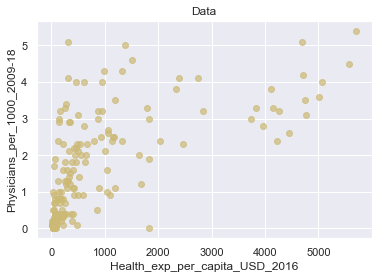

In [184]:
plt.scatter(dataset["Health_exp_per_capita_USD_2016"], dataset["Physicians_per_1000_2009-18"], color='y', alpha=.7)
plt.title("Data")
plt.xlabel("Health_exp_per_capita_USD_2016")
plt.ylabel("Physicians_per_1000_2009-18")
plt.show()

Nice and then we use sklearn to create a training set and test set. I will reserve 20% of the dataset for testing.

In [185]:
# Sklearn to split dataset

In [186]:
X_train, X_test, y_train, y_test = train_test_split(dataset["Health_exp_per_capita_USD_2016"], dataset["Physicians_per_1000_2009-18"], test_size=0.2, random_state=0)

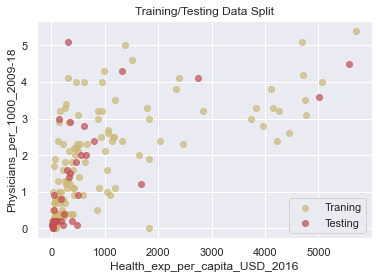

In [187]:
plt.scatter(X_train, y_train, label="Traning", color='y', alpha=.7)
plt.scatter(X_test, y_test, label="Testing", color='r', alpha=.7)
plt.legend()
plt.title("Training/Testing Data Split")
plt.xlabel("Health_exp_per_capita_USD_2016")
plt.ylabel("Physicians_per_1000_2009-18")
plt.show()

In [188]:
#Sklearn to create and Linear Regressor and fit data to it

In [189]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train.values) #training the algorithm

LinearRegression()

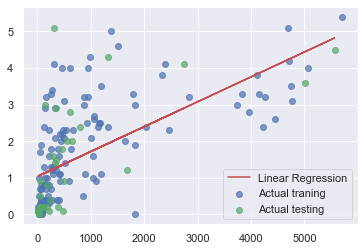

In [190]:
prediction = regressor.predict(X_test.values.reshape(-1,1))
plt.plot(X_test, prediction, label = "Linear Regression", color = 'r')
plt.scatter(X_train, y_train, label="Actual traning", color='b', alpha=.7)
plt.scatter(X_test, y_test, label="Actual testing", color='g', alpha=.7)
plt.legend()
plt.show()


To make sure that model works I will make a prediction. Let's assume that city spends $4000 on the health system. How many physitians per 1000 people we will get? The result is 3.75 which is very accurate according to the plot above.

In [191]:
# predict number of physitians if expencis per capita $4000
regressor.predict(np.array([[4000]]))[0]

3.7566433675847146

In [192]:
y_pred = regressor.predict(X_test.values.reshape(-1,1)) 

In [193]:
# Linear regression model to report accuracy/error rate on the test set

In [194]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [195]:
print('r2 - # The closer towards 1, the better the fit',regressor.score(X_test.values.reshape(-1,1), y_test.values))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

r2 - # The closer towards 1, the better the fit 0.37861265326238636
Mean Absolute Error: 0.9621419794755239
Mean Squared Error: 1.3700967690355461


The r2 score is 0.37 which is a poor result. Probably, the model is not that accurate as I expected to get. It is visually understandable since data points are spread out from the regressor line on the plot. Dependency is not as linear as I expected it to be before starting to work on that dataset.

## Section 3: Prepping the classification dataset

The dataset for classification has seven-column. I will map non-numerical column data to digits. The sex column will change to 1 for male and 0 for female, the region will change to 4 different digits: 'northwest':1, 'southeast':2, 'southwest':3, 'northeast':4. The smoker column becomes a target of classification and I will move it to a separate column calls target. The values become 1 for smokers and 0 for non-smokers people.

In [196]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
sns.set()
import warnings # turn off warnings for final notebook
warnings.filterwarnings("ignore")
import os # accessing directory structure

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [197]:
dataset = pd.read_csv('insurance.csv')
dataset.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [198]:
dataset.isnull().any().sort_values(ascending=False)

charges     False
region      False
smoker      False
children    False
bmi         False
sex         False
age         False
dtype: bool

In [199]:
dataset['sex'] = dataset['sex'].apply({'female':0,'male':1}.get) 
dataset['smoker'] = dataset['smoker'].apply({'yes':1, 'no':0}.get)
dataset['region'] = dataset['region'].apply({'northwest':1, 'southeast':2, 'southwest':3, 'northeast':4}.get)

In the code above, I checked if data needs any cleanup, which is not, and convert non-numeric features to numerical.

In [200]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,2.484305,1.104885,1.0000,2.00000,2.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<AxesSubplot:>

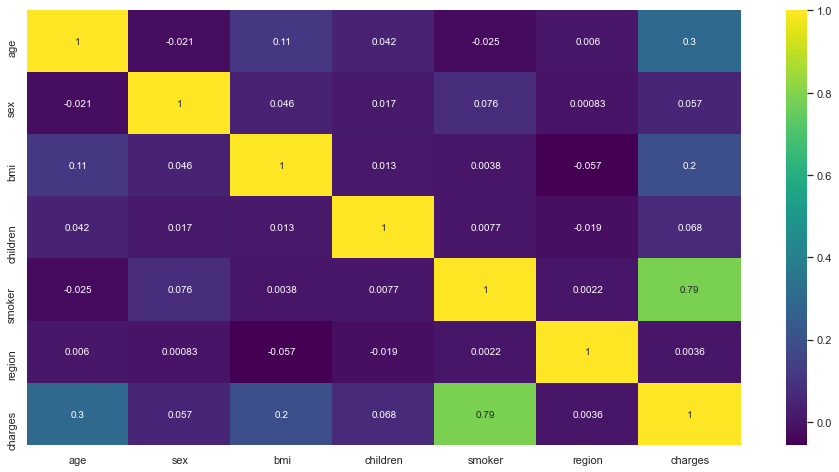

In [201]:
corr = dataset.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap = 'viridis')

The smoker column has the highest correlation to insurance charges, I think the smoker column will be a perfect target for the classification algorithm.

In [202]:
insurance = dataset.drop('smoker',axis='columns')
target = dataset['smoker']

In [203]:
target.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

## Section 4: Classification with a Neural Network (or classifier of choice)

Now it is time to do a decision tree algorithm. I will use sklearn to split data between the training set - 80% and the testing set - 20%. Then I will fit the decision tree model with my training set. I will show the errors.

In [204]:
#Sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(insurance, target, test_size=0.2, random_state=0)

In [205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(insurance)

array([[0.02173913, 0.        , 0.3212268 , 0.        , 0.66666667,
        0.25161076],
       [0.        , 1.        , 0.47914985, 0.2       , 0.33333333,
        0.00963595],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.33333333,
        0.05311516],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.33333333,
        0.00810808],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.66666667,
        0.01414352],
       [0.93478261, 0.        , 0.35270379, 0.        , 0.        ,
        0.44724873]])

After data scaled, to prevent overfilling the model, I will do fit.

In [206]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [207]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

Now let's predict if people smokers or not. I am the third prediction and I am not a smoker, which is correct. Prediction displays 1 if person smoker and 0 if not.

In [208]:
model.predict([[56, 1, 28.0, 1, 2, 45987.0]])

array([1], dtype=int64)

In [209]:
model.predict([[33, 1, 26.5, 0, 4, 567.9]])

array([0], dtype=int64)

In [210]:
model.predict([[31, 0, 22.5, 0, 4, 0.0]]) #I am 31 years old, bmi 22.5, no kids and live in northeast, no spending on insurance

array([0], dtype=int64)

In [211]:
y_pred = model.predict(X_test) 
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [212]:
print('r2 - # The closer towards 1, the better the fit',model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 - # The closer towards 1, the better the fit 0.9440298507462687
Root Mean Squared Error: 0.23658011170369192


Based on that result, the neural network is very accurate. The r2 value is very close to 1, which is good. The root mean square error is very low. The prediction value looks correct and I think this is a good result. The decision tree was my second choice and I am glad that this classifier type showed a pretty accurate result. I think my choice of the dataset for classifier was good.

## Conclusions

In a conclusion, The linear regression showed a poor result. Probably, the model is not that accurate as I expected to get. It is visually understandable since data points are spread out from the regressor line on the plot. Dependency is not as linear as I expected it to be before starting to work on that dataset. For future work on linear regression, I would select more features for the model, it might improve the r2 score. If it does not happen, the different dataset selection would be good.

The result of the classifier is amazing. It's more accurate than I expected to get. I definitely can see dependency between features and target. I would not improve anything but would be nice to try different classifiers algorithms on the same dataset.

The whole work on the assignment was interesting. I found a correlation that I was not expecting to get and I am joined to work on human health-related datasets.